In [307]:
using Plots
using LinearAlgebra
using Random
using Polynomials

## 2) Achar valor aproximado da função usando derivadas

### i)

In [308]:
function Taylor0(x,a, derivadas, M)#x é o valor que será avaliado
    E = M*(x-a)
    f_a=derivadas[1]
    return f_a, E
end

Taylor0 (generic function with 1 method)

### ii)

In [309]:
function Taylor1(x,a, derivadas, M)#x é o valor que será avaliado
    E = (M*(x-a)^2)/2
    f_a=derivadas[1] + derivadas[2]*(x-a)
    return f_a, E
end

Taylor1 (generic function with 1 method)

### iii)

In [310]:
function Taylor2(x,a, derivadas, M)#x é o valor que será avaliado
    E = (M*(x-a)^3)/6
    f_a=derivadas[1] + derivadas[2]*(x-a) +(derivadas[3]*(x-a)^2)/2
    return f_a, E
end

Taylor2 (generic function with 1 method)

### iv)

In [311]:
function TaylorN(x,a, derivadas, M)#x é o valor que será avaliado
    n, = size(derivadas)
    #ordem n-1
    E = (M*(x-a)^n)/factorial(n)
    soma=0
    for i in 1:n
        soma+= (derivadas[i]*(x-a)^(i-1))/factorial(i-1)
    end
    return soma#, E
end

#e^x  x=0.1 a=0
derivadas =[1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1]
print(abs(TaylorN(0.1, 0, derivadas, 10)-exp(0.1)))


4.440892098500626e-16

## 3) Encontrar raízes aproximadas

### i)

In [312]:

function média(x,y)#retorna a mádia entre x e y
    return (x+y)/2
end

function tem_sinais_opostos(f,a,b) #função recebe f(a) e f(b) não nulos e retorna true se f(a) e f(b) possuem sinais opostos, e retorna false caso contrário
    return f(a)*f(b) < 0
end

function é_raiz(f,a)
    return f(a)==0
end



function bissecao(f, a, b, erro) 
   
        
    if é_raiz(f,a)
        return a
    end
    if é_raiz(f,b)
        return b
    end
    if !(tem_sinais_opostos(f,a,b))
        return "Não tem sinais opostos"
    end    
    iterações = floor(log2((b-a)/erro))+1
    for i=1:iterações
        m=média(a,b)
        if é_raiz(f,m)
            return m
        end
            
        if tem_sinais_opostos(f,a,m)
            b=m
        else
            a=m
        end
    end
        
    return média(a,b)
end

 

bissecao (generic function with 1 method)

### ii)

In [313]:

function newton(funcao, a, b, erro)#funcao que implementa o método de newton
    
    chute_inicial=ceil(bissecao(funcao, a, b, erro))
    
    t = derivar_centralizada1(chute_inicial, funcao, 0.01)
    
    a= funcao(chute_inicial)
    
    return chute_inicial - a/t(chute_inicial)
end

function g(x)
    return x^2 - 4
end

newton(g, -0, 4, 0.1)

2.0

## 4) Interpolação Polinomial


### i)

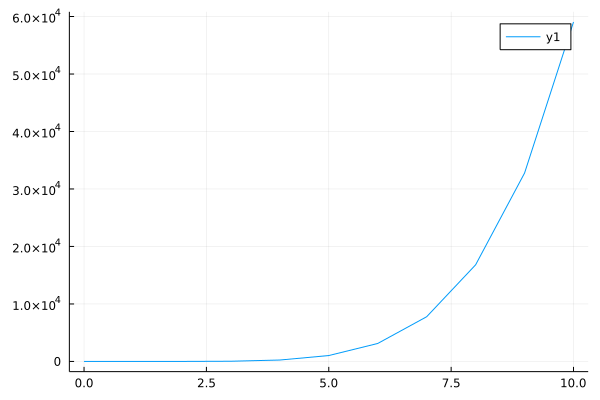

In [314]:
function interpolação(x,y)# função que calcula os coeficientes do polinomio interpolador, a partir da entrada de x e y
    n, = size(x)
    V=zeros(n, n)
    for i in 1:n
        for j in 1:n
            V[i,j]=x[i]^(j-1)
        end
    end
    c=inv(V)*y #resolver o sistema linear Vc=y
    #vetor de coeficientes
    function fp(t)
        soma = 0
        for i in 1:n
            soma+=c[i]*t^(i-1)
        end
        return soma    
    end
    return fp
end

x=[15.5; 16.5; 17.5]
y =[34; 200; 25]
fp=interpolação(x,y)
t =range(0, stop=10)
plot(t,f)


### ii)

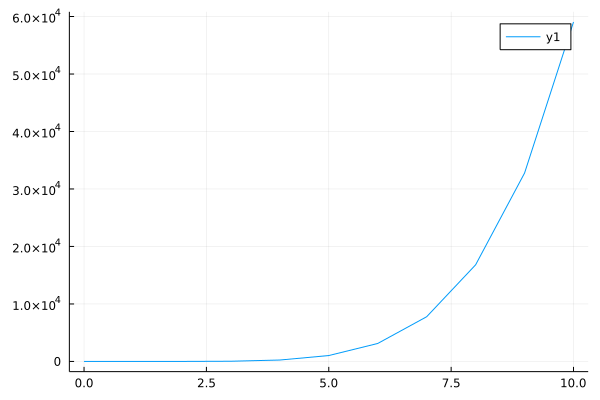

In [315]:
x=[15; 16.5; 17.5; 8]
y =[34; 30; 25; 16]
function interpola(x,y)# função que calcula os coeficientes do polinomio interpolador, a partir da entrada de x e y
    n, = size(x)
    L =zeros(n, 1)
    function f_ip(t)
        expressao=0
        for i in 1:n
            numerador=1
            denominador=1
            for j in 1:n
                if(i!=j)
                    numerador*=(t-x[j])
                    denominador*=(x[i] - x[j])
                end  
            end
            L[i]=numerador/denominador
            expressao+=L[i]*y[i]
            
        end
        return expressao
    end
    
    return f_ip
end


x=[15.5; 16.5; 17.5]
y =[34; 200; 25]
f_ip=interpola(x,y)
t =range(0, stop=10)
plot(t,f)

## 5-6) Regressão com coeficientes lineares

In [316]:
function vandermonde(x,y,grau)
    n,=size(y)
    V=zeros(n,grau+1)
    for i=1:n #linhas
        for j=1:(grau+1)
            V[i,j]=x[i]^(j-1)
        end
    end
    return V
end

function minimos_quadrados(a1,a2,b)
    A_novo = [a1'*a1 a1'*a2;a1'*a2 a2'*a2]
    b_novo = [b'*a1 ; b'*a2]
    x=matriz_inversa(A_novo)*b_novo
    return x
end

function regressão(x,y,grau)
    V=vandermonde(x,y,grau)
    c=inv(V'*V)*(V'*y) #mínimos quadrados
    #c=V\y
    return c, grau
end

function plota_regressão(regressao, grau)
    coefs = Float64[]
    p = Any[]
    for i=1:grau+1 #linhas
        push!(coefs, regressao[i])
        p = Polynomial(coefs)
    end
    return p
end

plota_regressão (generic function with 1 method)

In [317]:
Random.seed!(0)
# Gerando dados fictícios para teste
n = 30
x = range(0, 2, length=n)

0.0:0.06896551724137931:2.0

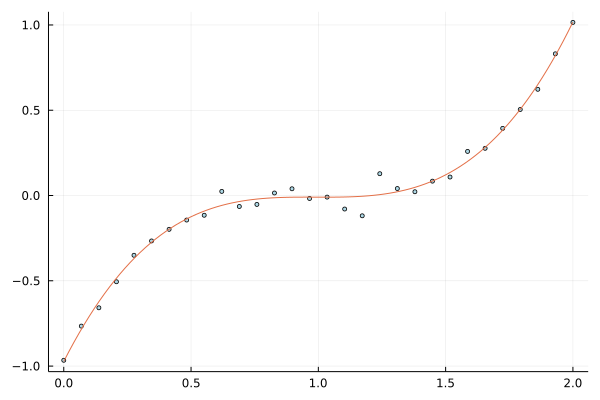

In [318]:
# Exemplo 1

f(x) = (x-1)^3

y = f.(x) + randn(n)*0.05 #ruído
scatter(x, y, c=:lightblue, ms=3, leg=false)
c, grau = regressão(x,y,3)
p3 = plota_regressão(c, 3)
plot!(p3, 0, 2)

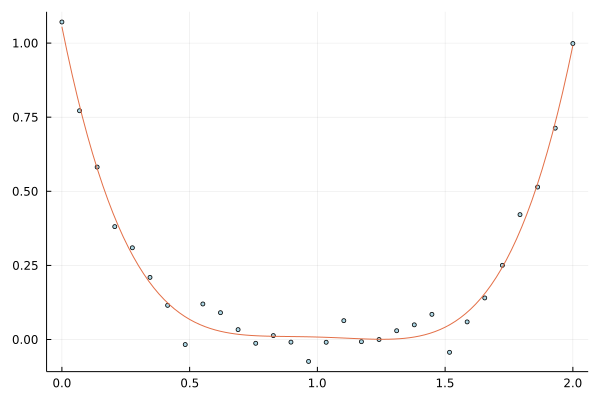

In [319]:
# Exemplo 2

f(x) = (x-1)^4

y = f.(x) + randn(n)*0.05 #ruído
scatter(x, y, c=:lightblue, ms=3, leg=false)
c, grau = regressão(x,y,4)
p4 = plota_regressão(c, 4)
plot!(p4, 0, 2)

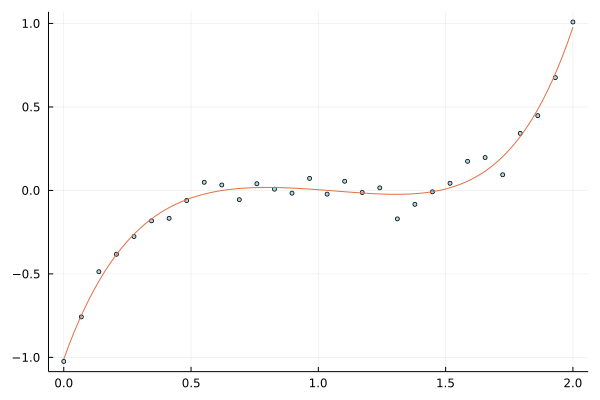

In [320]:
# Exemplo 3

f(x) = (x-1)^5

y = f.(x) + randn(n)*0.05 #ruído
scatter(x, y, c=:lightblue, ms=3, leg=false)
c, grau = regressão(x,y,5)
p5 = plota_regressão(c, 5)
plot!(p5, 0, 2)

## 7) Regressão com coeficientes não-lineares

## 8) Interpolação 2D

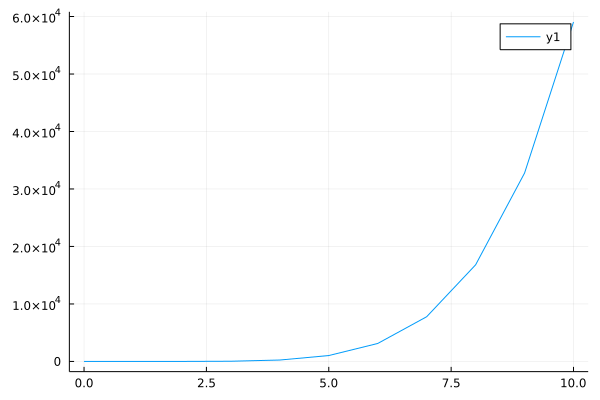

In [322]:
x=[15; 16.5; 17.5; 8]
y =[34; 30; 25; 16]
function interpola(x,y,z)# função que calcula os coeficientes do polinomio interpolador, a partir da entrada de x e y
    nx, = size(x)
    ny, = size(y)
    L =zeros(nx*ny, 1)
    function f_interpolacao_2d(t, w)
        expressao=0
        for i in 1:n
            numerador=1
            denominador=1
            
            for j in 1:n
                if(i!=j)
                    numerador*=(t-x[j])
                    denominador*=(x[i] - x[j])
                end  
            end

            L[i]=numerador/denominador
            expressao+=L[i]*y[i]
            
        end
        return expressao
    end
    
    return f_interpolacao_2d
end


x=[15.5; 16.5; 17.5]
y =[34; 200; 25]
f_interpolacao_2d=interpola(x,y)
t =range(0, stop=10)
plot(t,f)

## 9) Cálculo da norma do vetor


In [323]:
function norma(v)
    n, = size(v)
    soma =0
    for i in 1:n
        soma+=v[i]^2

    end    
    return sqrt(soma)
end

norma (generic function with 1 method)

## 10) Resolver sistema linear denso

In [324]:
function sistema_Aprox(A,b)
    A=A'*A
    b=A'*b
return inv(A)*b    
end

sistema_Aprox (generic function with 1 method)

## 12) Sistema triangular superior

In [325]:
# Entrada matriz A e b
# Saida true  se a matriz A eh quadrada e se o numero de linhas da matriz B eh o mesmo numero de colunas da matriz A. False, caso contrario
# Verifica se a matriz A eh quadrada e se o numero de linhas da matriz B eh o mesmo numero de colunas da matriz A.
function verifica_tamanho(A,b)
    if (size(A)[1] != size(A)[2]) # Verificando se a matriz eh quadrada
        println("ERRO! Matriz A nao eh quadrada")
        return false
    end

    if (size(b)[1] != size(A)[2]) # Verificando se o numero de linhas de B eh o mesmo que de colunas de A
        println("ERRO! O numero de linhas da matriz B não eh o mesmo do numero de colunas da matriz A")
        return false
    end
    
    return true
end

verifica_tamanho (generic function with 1 method)

In [326]:
# Entrada matriz A e b
# Saída x tal que A * x = b
# Onde A é triangular superior aonde os elementos da diagonal são diferentes de zero e a parte inferior, por sua vez, eh composta por zeros
function sistema_triangular_superior(A,b) 
    # inicializacao de variaveis
    n,=size(A) 
    x = zeros(n, 1)
    #verificação de erro no tamanho das matrizes
    if (!verifica_tamanho(A,b))
      return "ERRO"
    end
  
    for i in reverse(1:n) # comecamos da ultima linha da matriz, o percorrendo "de baixo para cima"
      #na pratica isolamos a incognita da linha i, para descobrir o seu valor
      #como comecamos na ultima linha, a variavel dessa linha ja tem seu valor conhecido
      #a partir da penultima linha, as variaveis tem seus valores baseados na linha abaixo que áforam calculados. 
      soma = 0
      for j in i+1:n
          soma+=A[i, j]*x[j]
      end 
      x[i] = (b[i] - soma)/(A[i,i])
    end
  return x
  end
  

sistema_triangular_superior (generic function with 1 method)

## 13) Sistema triangular inferior

In [327]:
# Entrada matriz A e b
# Saida x tal que A * x = b
# onde A eh triangular inferior aonde os elementos da diagonal sao diferentes de zero e a parte superior, por sua vez, eh composta de zeros
function sistema_triangular_inferior(A,b) #
    # inicializacao de variaveis
    n,=size(A)
    x = zeros(n, 1)
  
    if (!verifica_tamanho(A,b))
      return "ERRO"
    end
  
    for i in 1:n
      soma = 0
  
      # comecamos da ultima linha da matriz, a percorrendo "de baixo para cima"
      #na pratica isolamos a incognita da linha i, para descobrir o seu valor
      #como comecamos na ultima linha, a variavel dessa linha ja tem seu valor conhecido
      #a partir da penultima linha, as variaveis tem seus valores baseados na linha abaixo que já foram calculados.     
      for j in 1:i-1
          soma+=A[i, j]*x[j]
      end 
      x[i] = (b[i] - soma)/(A[i,i])
    end
  return x
  end

sistema_triangular_inferior (generic function with 1 method)

## 14) Sistema diagonal

In [328]:
# Entrada matriz A e b
# Saída x tal que A * x = b
# Onde A é a matriz em que a diagonal principal tem elementos diferentes de 0 e o restante dos elementos
# possuem valor 0, a funcao a seguir resolver esse caso.
function sistema_diagonal(A,b)
    # inicializacao de variaveis  
    n,=size(A)
    x = zeros(n, 1)
  
    if (!verifica_tamanho(A,b))
      return "ERRO"
    end
    
    for i in 1:n
      x[i] = b[i]/A[i,i] # Expressao que calcula  A * x = b
    end
  return x
  end

sistema_diagonal (generic function with 1 method)

## 15) Inversa da matriz

In [329]:
function matriz_inversa(A)
    n,=size(A)
    b = zeros(n, n)
    inverse = zeros(n,n)

    #verificação de erro no tamanho das matrizes
    if (!verifica_tamanho(A,b))
        return "ERRO"
    end

    for i in 1:n
        b[i,i] = 1
    end

    # chamamos a decomposicao de A em L e U
    L,U=lu(A)
    for i in 1:n
        y=sistema_triangular_inferior(L,b[i,:])
        x=sistema_triangular_superior(U,y)
        inverse[[i],:]=x
    end
    
    return inverse'
end

matriz_inversa (generic function with 1 method)

## 16) Decomposição LU

In [330]:
# Entrada: matriz A
# Saida: L, matriz triangular inferior de A e U matriz triangular superior de A
# Fazemos a decomposicao da matriz A em duas matrizes L e U, tal que A = L * U
function lu_decomposition(A)
    n,=size(A)
    U = copy(A)
    L = zeros(n, n)

    for i in 1:n-1 # for por coluna
        pivot = U[i,i]
        L[i,i] = 1
        for j in i+1:n # for da linha
            fator = U[j,i]/pivot;
            L[j,i] = fator
            for k in 1:n # for pra calcular o valor da linha
                U[j, k] -= fator * U[i,k] # calcula linha
            end
        end
    end

    L[n,n] = 1
    
    return L,U
end

            

lu_decomposition (generic function with 1 method)

## 17 Problema do valor do contorno

## 18) Integração numérica com número de intervalos

In [331]:
function trapezio(f,n, a,b) #calcular a integral f(x) de a até b
    h=(b-a)/n
    S=0.0
    for i=1:(n-1)  #calcula o "meio"
        x=a+i*h
        S+=2*f(x)
    end
    S=h/2*(S+f(a)+f(b)) #calcula "as pontas"
    return S
end


trapezio (generic function with 2 methods)

## 19) Integração numérica com erro

In [332]:
function trapezio(f, tol, a,b, M) #calcular a integral f(x) de a até b
    n=ceil(sqrt((M*(b-a)^3)/(12*tol)))
    
    h=(b-a)/n
    S=0.0
    for i=1:(n-1)  #calcula o "meio"
        x=a+i*h
        S+=2*f(x)
    end
    S=h/2*(S+f(a)+f(b)) #calcula "as pontas"
    return S
end


trapezio (generic function with 2 methods)

## 21) Derivada numérica com função contínua

### i)

In [333]:
function derivar_frente1(x, funcao, h)#funcao que calcula a derivada para frente
    function z(x)
        return (funcao(x+h)-funcao(x))/h

    end    
    return z
end    
    
function r(x)
    return x^3
end

d_f = derivar_frente1(2, r, 0.00001)
d_f(7)


147.0002099949852

### ii)

In [334]:
function derivar_tras1(x, funcao, h)#funcao que calcula a derivada para trás    
    function z(x)
        return (funcao(x)-funcao(x-h))/h
    end    
    
    return z
end  

function r(x)
    return x^2
end

d_t = derivar_tras1(2, r, 0.00001)
print(exp(7))
d_t(7)


1096.6331584284585

13.999989999291527

### iii)

In [335]:
function derivar_centralizada1(x, funcao, h)#funcao que calcula a derivada utilizando as duas funções derivadas, somando as duas e dividindo por dois, para garantir um resultado mais acertivo
    function z(x)
        return (funcao(x+h)-funcao(x-h))/(2*h)
    end
    return z
end

function r(x)
    return x^2
end

d_c = derivar_centralizada1(2, r, 0.0000001)

d_c(7)

14.000000057023954

## 22) Derivada numérica com função discreta

## i)

In [336]:
function derivar_frente2(f, x)#funcao que calcula a derivada para trás    
    n,= size(x)
    y=zeros(n-1,1)
    for i in 1:n-1
        y[i]=f[i+1]-f[i]
    end    
    return y
end  

f_df_2=[30000 32000 34000 36000 38000 40000 42000 44000 46000 48000 50000]
x=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
derivar_frente2(f_df_2, x)

10×1 Array{Float64,2}:
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0

## ii)

In [337]:
function derivar_tras2(f, x)#funcao que calcula a derivada para trás    
    n,= size(x)
    y=zeros(n-1,1)
    for i in reverse(2:n)
        y[i-1]=f[i]-f[i-1]
    end    
    return y
end  

f_dt_2=[30000 32000 34000 36000 38000 40000 42000 44000 46000 48000 50000]
x=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
derivar_tras2(f_dt_2, x)

10×1 Array{Float64,2}:
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0

### iii)

In [338]:
function derivar_centralizada2(f, x)#funcao que calcula a derivada utilizando as duas funções derivadas, somando as duas e dividindo por dois, para garantir um resultado mais acertivo
    n,= size(x)
    y=zeros(n-2,1)
    for i in 2:n-1
        y[i-1]=(f[i+1]-f[i-1])/2
    end    
    return y
end

f_dc_2=[30000 32000 34000 36000 38000 40000 42000 44000 46000 48000 50000]
x=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
derivar_centralizada2(f_dc_2, x)

9×1 Array{Float64,2}:
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0
 2000.0